In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/d/adityajn105/flickr8k/captions.txt
/kaggle/input/d/adityajn105/flickr8k/Images/3226254560_2f8ac147ea.jpg
/kaggle/input/d/adityajn105/flickr8k/Images/214543992_ce6c0d9f9b.jpg
/kaggle/input/d/adityajn105/flickr8k/Images/2366643786_9c9a830db8.jpg
/kaggle/input/d/adityajn105/flickr8k/Images/3368819708_0bfa0808f8.jpg
/kaggle/input/d/adityajn105/flickr8k/Images/2190227737_6e0bde2623.jpg
/kaggle/input/d/adityajn105/flickr8k/Images/2752809449_632cd991b3.jpg
/kaggle/input/d/adityajn105/flickr8k/Images/3097776588_312932e438.jpg
/kaggle/input/d/adityajn105/flickr8k/Images/1206506157_c7956accd5.jpg
/kaggle/input/d/adityajn105/flickr8k/Images/1319634306_816f21677f.jpg
/kaggle/input/d/adityajn105/flickr8k/Images/2465218087_fca77998c6.jpg
/kaggle/input/d/adityajn105/flickr8k/Images/3351493005_6e5030f596.jpg
/kaggle/input/d/adityajn105/flickr8k/Images/2949337912_beba55698b.jpg
/kaggle/input/d/adityajn105/flickr8k/Images/534886684_a6c9f40fa1.jpg
/kaggle/input/d/adityajn105/flickr8k/Image

In [2]:
import numpy as np 
import os 
import pickle
from tqdm.notebook import tqdm
from tensorflow.keras.applications.vgg16 import VGG16 , preprocess_input
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical , plot_model
from tensorflow.keras.layers import Input,Dense,LSTM,Embedding,Dropout, add

In [3]:
Base_dir='/content/drive/MyDrive/Image Caption Generator Project'

In [4]:
# Extract Image Features
model=VGG16()

# restructure the model
model=Model(inputs=model.inputs, outputs=model.layers[-2].output)

#summary
print(model.summary())

553476096/553467096 [==============================] - 3s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
!apt install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


In [5]:
!unzip -q "/content/drive/MyDrive/Image Caption Generator Project/Images.zip"

In [ ]:
!pwd

/content


In [ ]:
# kaggle/input/flickr8k/Flickr_Data/Flickr_Data/Images/3368819708_0bfa0808f8.j


# Extract features from image
features={}

dir="/content/Images"
for img_name in tqdm(os.listdir(dir)):
    # Load image from file
    img_path =dir + '/' + img_name
    
    img=load_img(img_path , target_size=(224,224))

    #Convert image pixels in numpy array
    img=img_to_array(img)

    # Reshape data for model
    img=img.reshape((1, img.shape[0] , img.shape[1], img.shape[2]))

    #Preprocess Image for VGG
    img=preprocess_input(img)

    #Extract Features
    feature=model.predict(img,verbose=0)

    #Get Image ID
    image_id= img_name.split('.')[0]

    #store feature
    features[image_id]=feature

  0%|          | 0/8091 [00:00<?, ?it/s]

In [6]:
working_dir = '/content/drive/MyDrive/Image Caption Generator Project'

In [ ]:
# Store features in pickle file
pickle.dump(features, open(os.path.join(working_dir,'features.pkl') ,'wb'))

# 'wb' means write binary . We saved the features in a pickle file so that we do not have to extract the features 
# again and again.

In [7]:
# load features from pickle
with open(os.path.join(working_dir, 'features.pkl'), 'rb') as f:
    features=pickle.load(f)

In [ ]:
features

{'2677614492_792023b928': array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 '2873252292_ebf23f5f10': array([[0.        , 0.        , 0.        , ..., 0.        , 0.82666796,
         6.0757604 ]], dtype=float32),
 '235065283_1f9a3c79db': array([[3.4932117 , 0.        , 0.7453723 , ..., 0.        , 0.68011105,
         1.677098  ]], dtype=float32),
 '2060031241_a3ae7a06bb': array([[0.7424128, 1.0715905, 1.7480891, ..., 0.       , 0.       ,
         2.6855857]], dtype=float32),
 '3436259762_43709321ff': array([[0.8450551, 0.       , 0.       , ..., 0.       , 3.347802 ,
         0.       ]], dtype=float32),
 '2797185895_4d9e1e9508': array([[0.4260016 , 0.        , 0.        , ..., 1.0045533 , 0.29467332,
         1.092901  ]], dtype=float32),
 '498404951_527adba7b8': array([[0.       , 0.       , 3.4670873, ..., 8.32775  , 0.       ,
         0.       ]], dtype=float32),
 '278559394_b23af734b9': array([[1.5971255 , 2.0255659 , 0.        , ..., 0.        , 0.53227574,
         0.  

## Load the Captions

In [8]:
# /kaggle/input/flickr8k/Flickr_Data/Flickr_Data/flickr8ktextfiles/flickr_8k_train_dataset.txt

with open("/content/drive/MyDrive/Image Caption Generator Project/captions.txt", 'r') as f:
#     We want to skip first line 
    next(f)  
    captions_doc=f.read()

In [ ]:
captions_doc

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
len(captions_doc)

3319280

In [ ]:
type(captions_doc)

str

In [ ]:
# import re
# captions_doc = re.sub("#\d[\(\)]t" , "," , captions_doc)

In [ ]:
# for i in captions_doc.split('\n'):
#     temp= i .split(',')
#     print(temp)

In [9]:
# Create mappinng of image to captions

mapping={}

for lines in tqdm(captions_doc.split('\n')):
#     Split the line by comma
    tokens=lines.split(',')
    if len(lines)<2: continue
    
    image_id, caption= tokens[0], tokens[1:]
    
    # remove extensions
    image_id=image_id.split('.')[0]
    
    
    #convert caption list into string
    caption="".join(caption)
    
    if image_id not in mapping:
        mapping[image_id]=[]
        
    mapping[image_id].append(caption)
    
    
    

  0%|          | 0/40456 [00:00<?, ?it/s]

In [ ]:
mapping

{'1000268201_693b08cb0e': ['A child in a pink dress is climbing up a set of stairs in an entry way .',
  'A girl going into a wooden building .',
  'A little girl climbing into a wooden playhouse .',
  'A little girl climbing the stairs to her playhouse .',
  'A little girl in a pink dress going into a wooden cabin .'],
 '1001773457_577c3a7d70': ['A black dog and a spotted dog are fighting',
  'A black dog and a tri-colored dog playing with each other on the road .',
  'A black dog and a white dog with brown spots are staring at each other in the street .',
  'Two dogs of different breeds looking at each other on the road .',
  'Two dogs on pavement moving toward each other .'],
 '1002674143_1b742ab4b8': ['A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl .',
  'A little girl is sitting in front of a large painted rainbow .',
  'A small girl in the grass plays with fingerpaints in front of a white canvas with a rainbow on it .',
  'There is a gi

In [ ]:
len(mapping)

8091

## Preprocess Captions

In [ ]:
mapping.items()

Output hidden; open in https://colab.research.google.com to view.

In [10]:
def clean(mapping):
    for key,captions in mapping.items():
        for i in range(len(captions)):
            caption=captions[i]   #Taking one sentence at a time
            #Preprocess steps 
            
            #converting into lowercase
            caption=caption.lower()
            
            #delete digits , special chars etc.
            caption=caption.replace('[^A-Za-z]', '')
            
            #delete additional spaces
            caption=caption.replace('\s+', ' ')
            
            #adding start and end tags
            #we want to remove single char word like 'a' etc.
            caption='startseq ' + " ".join([word for word in caption.split() if len(word)>1]) + ' endseq'
            
            captions[i]=caption
            
            
               

        
    

In [11]:
# Before preprocess of data
mapping['1000268201_693b08cb0e']

['A child in a pink dress is climbing up a set of stairs in an entry way .',
 'A girl going into a wooden building .',
 'A little girl climbing into a wooden playhouse .',
 'A little girl climbing the stairs to her playhouse .',
 'A little girl in a pink dress going into a wooden cabin .']

In [12]:
# Preprocess the text

clean(mapping)

In [13]:
# After preprocessing
mapping['1000268201_693b08cb0e']

['startseq child in pink dress is climbing up set of stairs in an entry way endseq',
 'startseq girl going into wooden building endseq',
 'startseq little girl climbing into wooden playhouse endseq',
 'startseq little girl climbing the stairs to her playhouse endseq',
 'startseq little girl in pink dress going into wooden cabin endseq']

In [ ]:
mapping

{'1000268201_693b08cb0e': ['startseq child in pink dress is climbing up set of stairs in an entry way endseq',
  'startseq girl going into wooden building endseq',
  'startseq little girl climbing into wooden playhouse endseq',
  'startseq little girl climbing the stairs to her playhouse endseq',
  'startseq little girl in pink dress going into wooden cabin endseq'],
 '1001773457_577c3a7d70': ['startseq black dog and spotted dog are fighting endseq',
  'startseq black dog and tri-colored dog playing with each other on the road endseq',
  'startseq black dog and white dog with brown spots are staring at each other in the street endseq',
  'startseq two dogs of different breeds looking at each other on the road endseq',
  'startseq two dogs on pavement moving toward each other endseq'],
 '1002674143_1b742ab4b8': ['startseq little girl covered in paint sits in front of painted rainbow with her hands in bowl endseq',
  'startseq little girl is sitting in front of large painted rainbow ends

In [14]:
all_captions=[]
for key in mapping:
    for caption in mapping[key]:
        all_captions.append(caption)
    

In [15]:
len(all_captions)   # Unique captions

40455

In [16]:
all_captions[:5]

['startseq child in pink dress is climbing up set of stairs in an entry way endseq',
 'startseq girl going into wooden building endseq',
 'startseq little girl climbing into wooden playhouse endseq',
 'startseq little girl climbing the stairs to her playhouse endseq',
 'startseq little girl in pink dress going into wooden cabin endseq']

In [17]:
# Tokenize the text
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)
vocab_size= len(tokenizer.word_index)+1

In [ ]:
vocab_size

8485

In [ ]:
len(all_captions[0].split())

16

In [18]:
# Get maximum Length
max_length= max(len(caption.split()) for caption in all_captions )
max_length

35

# Train test Split

In [19]:
image_ids= list(mapping.keys())

# We will be using 80%-20 % train test split ratio 

split=int(len(image_ids)*0.80)
train_data= image_ids[:split]
test_data = image_ids[split:]


In [ ]:
# startseq girl going into wooden building endseq

#        X                    y
# startseq                   girl
# startseq girl              going
# startseq girl going        into
# ...........
# startseq girl going into wooden building  endseq

In [ ]:
# texts_to_sequences(['The dog is on the bed'])   gives output  [[2, 1, 5, 6, 2, 1]]

In [20]:
# create data generator to get data in batch (avoids session crash)
def data_generator(data_keys, mapping, features, tokenizer, max_length, vocab_size, batch_size):
    # loop over images
    X1, X2, y = list(), list(), list()
    n = 0
    while 1:
        for key in data_keys:
            n += 1
            captions = mapping[key]
            # process each caption
            for caption in captions:
                # encode the sequence
                seq = tokenizer.texts_to_sequences([caption])[0]
                # split the sequence into X, y pairs
                for i in range(1, len(seq)):
                    # split into input and output pairs
                    in_seq, out_seq = seq[:i], seq[i]
                    # pad input sequence
                    in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                    # encode output sequence
                    out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
                    
                    # store the sequences
                    X1.append(features[key][0])
                    X2.append(in_seq)
                    y.append(out_seq)
            if n == batch_size:
                X1, X2, y = np.array(X1), np.array(X2), np.array(y)
                yield [X1, X2], y
                X1, X2, y = list(), list(), list()
                n = 0
    

In [21]:
vocab_size

8485

# Model Creation

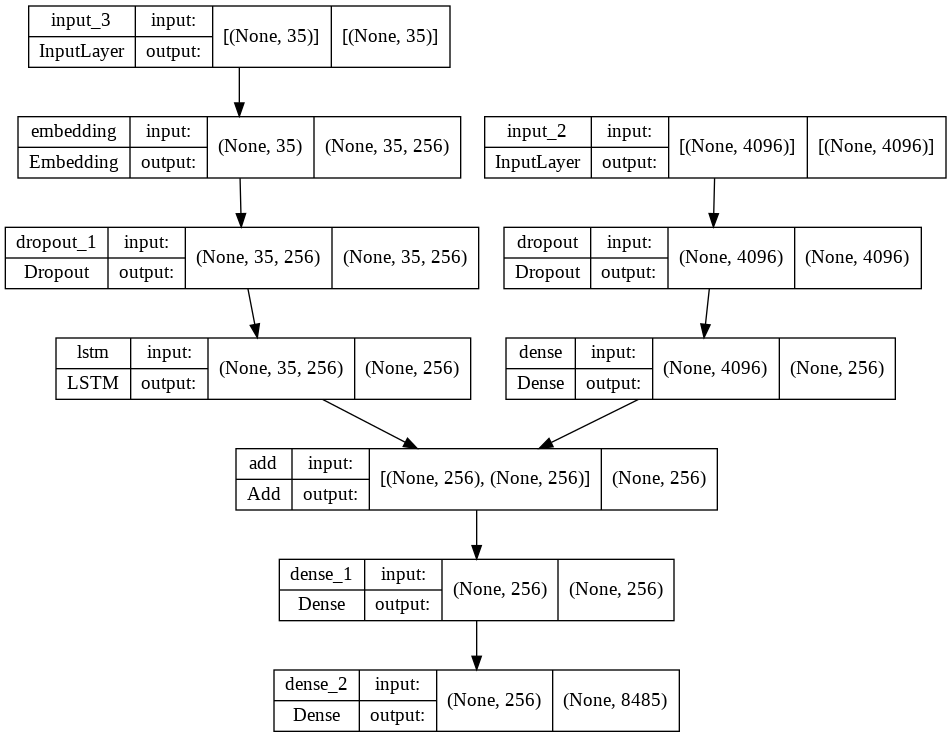

In [22]:
# encoder model

# image feature layers
inputs1 = Input(shape=(4096,))
fe1 = Dropout(0.5)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)

# sequence feature layers
inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.5)(se1)
se3 = LSTM(256)(se2)

# decoder model
decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam' ,metrics=['accuracy'])

# plot the model
plot_model(model, show_shapes=True)

In [ ]:
features

{'3226254560_2f8ac147ea': array([[0.       , 1.6273935, 0.       , ..., 0.       , 1.5637901,
         0.       ]], dtype=float32),
 '214543992_ce6c0d9f9b': array([[0.       , 3.4764283, 7.3570986, ..., 0.       , 0.       ,
         0.       ]], dtype=float32),
 '2366643786_9c9a830db8': array([[0.528148  , 2.1963968 , 0.6192956 , ..., 0.        , 2.1911259 ,
         0.05549765]], dtype=float32),
 '3368819708_0bfa0808f8': array([[0.       , 0.       , 0.       , ..., 0.       , 1.4570267,
         1.778822 ]], dtype=float32),
 '2190227737_6e0bde2623': array([[2.230774  , 0.        , 0.        , ..., 0.        , 0.30125445,
         1.9981861 ]], dtype=float32),
 '2752809449_632cd991b3': array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 '3097776588_312932e438': array([[0.45750463, 0.35810986, 0.        , ..., 0.        , 0.        ,
         1.5367092 ]], dtype=float32),
 '1206506157_c7956accd5': array([[0.      , 0.      , 3.642538, ..., 0.      , 0.      , 0.      ]],
       dt

In [23]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
#pip install tensorflow-gpu

In [ ]:
!nvidia-smi

Fri Sep 16 08:26:59 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.82.01    Driver Version: 470.82.01    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    33W / 250W |  15959MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [24]:
# !watch -n 5 nvidia-smi -a --display=utilization

# train the model
epochs = 50
batch_size = 128
steps = len(train_data) // batch_size

for i in range(epochs):
    # create data generator
    generator = data_generator(train_data, mapping, features, tokenizer, max_length, vocab_size, batch_size)
    # fit for one epoch
    model.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)

  5/101 [>.............................] - ETA: 16:12 - loss: 7.8023 - accuracy: 0.0757

KeyboardInterrupt: ignored

In [ ]:
model.save(working_dir + '/model_100epochs.h5')

### Loading h5 Model

In [ ]:
from tensorflow import keras
model=keras.models.load_model('/content/drive/MyDrive/Image Caption Generator Project/model_50epochs.h5')

# Generate Captions for Word

In [38]:
def idx_to_word(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [ ]:
# generate caption for an image
def predict_caption(model, image, tokenizer, max_length):

    # add start tag for generation process
    in_text = 'startseq'

    # iterate over the max length of sequence
    for i in range(max_length):

        # encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]

        # pad the sequence
        sequence = pad_sequences([sequence], max_length)

        # predict next word
        yhat = model.predict([image, sequence], verbose=0)

        # get index with high probability
        yhat = np.argmax(yhat)

        # convert index to word
        word = idx_to_word(yhat, tokenizer)

        # stop if word not found
        if word is None:
            break

        # append word as input for generating next word
        in_text += " " + word
        
        # stop if we reach end tag
        if word == 'endseq':
            break
      
    return in_text

In [ ]:
from nltk.translate.bleu_score import corpus_bleu
# validate with test data
actual, predicted = list(), list()

for key in tqdm(test_data):
    # get actual caption
    captions = mapping[key]
    # predict the caption for image
    y_pred = predict_caption(model, features[key], tokenizer, max_length) 
    # split into words
    actual_captions = [caption.split() for caption in captions]
    y_pred = y_pred.split()
    # append to the list
    actual.append(actual_captions)
    predicted.append(y_pred)
    
# calcuate BLEU score
print("BLEU-1: %f" % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
print("BLEU-2: %f" % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))

  0%|          | 0/1214 [00:00<?, ?it/s]

BLEU-1: 0.530365
BLEU-2: 0.303048


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

BASE_DIR = "/content"
def generate_caption(image_name):

    
    # load the image
    # image_name = "1001773457_577c3a7d70.jpg"
    image_id = image_name.split('.')[0]
    img_path = os.path.join(BASE_DIR, "Images", image_name)
    image = Image.open(img_path)
    captions = mapping[image_id]
    print('---------------------Actual---------------------')
    for caption in captions:
        print(caption)
    # predict the caption
    y_pred = predict_caption(model, features[image_id], tokenizer, max_length)
    print('--------------------Predicted--------------------')
    print(y_pred)
    plt.imshow(image)

In [ ]:
print(dir)

<built-in function dir>


In [ ]:
captions_doc

Output hidden; open in https://colab.research.google.com to view.

---------------------Actual---------------------
startseq child in pink dress is climbing up set of stairs in an entry way endseq
startseq girl going into wooden building endseq
startseq little girl climbing into wooden playhouse endseq
startseq little girl climbing the stairs to her playhouse endseq
startseq little girl in pink dress going into wooden cabin endseq
--------------------Predicted--------------------
startseq man is sitting at table outside house with playhouse in the background endseq


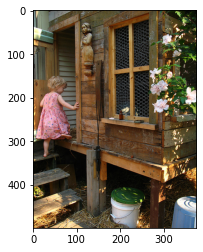

In [ ]:
generate_caption("1000268201_693b08cb0e.jpg")

In [80]:
# Tokenize the text

from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)
vocab_size= len(tokenizer.word_index)+1

pickle.dump(tokenizer, open('/content/drive/MyDrive/Image Caption Generator Project/tokenizer.pkl', 'wb'))

In [66]:
# def extract_features(img_name):
#     # Extract features from image
#     # load the model
#     model_vgg = VGG16()
#     # re-structure the model
#     model_vgg = Model(inputs=model.inputs, outputs=model.layers[-2].output)

#     # dir="/content/Images"
#     img=load_img(img_name , target_size=(224,224))

#     #Convert image pixels in numpy array
#     img=img_to_array(img)

#     # Reshape data for model
#     img=img.reshape((1, img.shape[0] , img.shape[1], img.shape[2]))

#     #Preprocess Image for VGG
#     img=preprocess_input(img)

#     #Extract Features
#     feature=model_vgg.predict(img,verbose=0)

#     #Get Image ID
#     image_id= img_name.split('.')[0]

    #store feature
    # return feature

    

In [67]:
def idx_to_word(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [68]:
from tensorflow import keras
# model=keras.models.load_model('/content/drive/MyDrive/Image Caption Generator Project/model_50epochs.h5')


In [69]:
# def custom_caption(model, tokenizer, photo, max_length):
#     # load the image
#     # image_name = "1001773457_577c3a7d70.jpg"
#     # add start tag for generation process
#     in_text = 'startseq'

#     # iterate over the max length of sequence
#     for i in range(max_length):

#         # encode input sequence
#         sequence = tokenizer.texts_to_sequences([in_text])[0]

#         # pad the sequence
#         sequence = pad_sequences([sequence], max_length)

#         # predict next word
#         yhat = model.predict([image, sequence], verbose=0)

#         # get index with high probability
#         yhat = np.argmax(yhat)

#         # convert index to word
#         word = idx_to_word(yhat, tokenizer)

#         # stop if word not found
#         if word is None:
#             break

#         # append word as input for generating next word
#         in_text += " " + word
        
#         # stop if we reach end tag
#         if word == 'endseq':
#             break
      
#     return in_text
    

In [70]:
# img_path = '/content/drive/MyDrive/Image Caption Generator Project/Custom_Images/800wm.jpg'

# def my_func(imagepath):
#     photo = extract_features(imagepath)
#     # generate description
#     description = custom_caption(model, tokenizer, photo, 35)
#     image = Image.open(img_path)
#     plt.imshow(image)
#     print(description)

In [71]:
# my_func(img_path)

ValueError: ignored

In [37]:
# custom_caption('images.jpg', '/content/drive/MyDrive/Image Caption Generator Project')

553476096/553467096 [==============================] - 3s 0us/step


ValueError: ignored

In [73]:
# extract features from each photo in the directory
def extract_features(filename):
    # load the model
    model = VGG16()
    # re-structure the model
    model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
    # load the photo
    image = load_img(filename, target_size=(224, 224))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)
    # get features
    feature = model.predict(image, verbose=0)
    return feature

# map an integer to a word
def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [77]:
# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
    # seed the generation process
    in_text = 'startseq'
    # iterate over the whole length of the sequence
    for i in range(max_length):
        # integer encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad input
        sequence = pad_sequences([sequence], maxlen=max_length)
        # predict next word
        yhat = model.predict([photo,sequence], verbose=0)
        # convert probability to integer
        yhat = np.argmax(yhat)
        # map integer to word
        word = idx_to_word(yhat, tokenizer)
        # stop if we cannot map the word
        if word is None:
            break
        # append as input for generating the next word
        in_text += ' ' + word
        # stop if we predict the end of the sequence
        if word == 'endseq':
            break
    return in_text

In [78]:
max_length=35

 little girl in yellow shirt is playing with toy inside toys


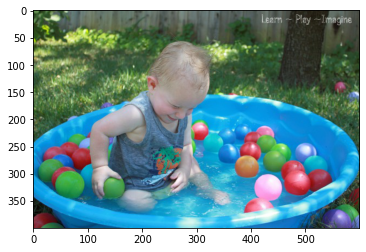

In [89]:
# load the tokenizer
# tokenizer = load(open('tokenizer.pkl', 'rb'))
# print(type(tokenizer))
# pre-define the max sequence length (from training)
# max_length = 33
# load the model

tokenizer = pickle.load(open('/content/drive/MyDrive/Image Caption Generator Project/tokenizer.pkl', 'rb'))

img_path = '/content/drive/MyDrive/Image Caption Generator Project/Custom_Images/Water Play with Balls for Summer Fun (10).jpg'

model=keras.models.load_model('/content/drive/MyDrive/Image Caption Generator Project/model_50epochs.h5')


# load and prepare the photograph
photo = extract_features(img_path)
# generate description
description = generate_desc(model, tokenizer, photo, max_length)
image = Image.open(img_path)
plt.imshow(image)

ans=''
for i in description.split(' '):
    if(i !='startseq' and i !='endseq'):
        ans=ans + ' ' + i
print(ans) 